<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U4_Ej3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N° 3

El dataset Penguins contiene información acerca de un conjunto de pingüinos que habitan el Archipiélago Palmer, un archipiélago del Océano Glacial Antártico que se encuentra conformado por un conjunto de islas montañosas.

Sobre cada ejemplar se cuenta con la siguiente información:

- species: especie a la que pertenece (Chinstrap, Adélie o Gentoo).
- culmen_length_mm: largo del culmen, cresta superior del pico (mm).
- culmen_depth_mm: altura del culmen (mm).
- flipper_length_mm: largo de la aleta (mm).
- body_mass_g: masa corporal (g).
- island: nombre de la isla del Archipiélago Palmer en la que habita (Dream, Torgersen o Biscoe).
- sex: sexo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


In [3]:
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. Reproduzca el gráfico mostrado en la Figura 3 para visualizar la distribución del largo de la aleta entre las distintas especies de pingüinos. En el mismo se utilizaron colores pertenecientes a la paleta magma.

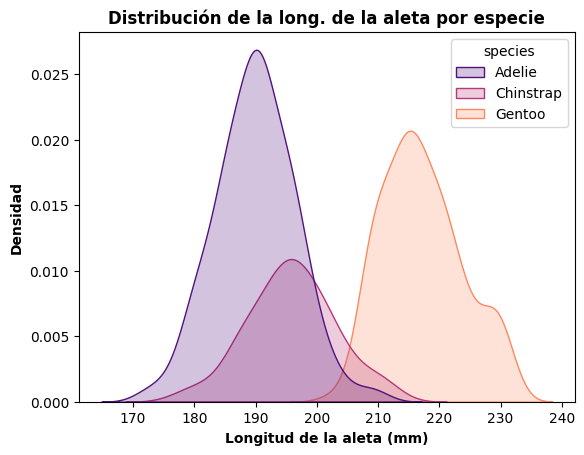

In [18]:
# Configurar la paleta de colores
colores = sns.color_palette("magma",n_colors=3)

sns.kdeplot(x = 'flipper_length_mm', hue = 'species', multiple = 'layer', fill = True, data = data, palette=colores, common_norm=True)
plt.xlabel('Longitud de la aleta (mm)', fontweight = 'bold')
plt.ylabel('Densidad', fontweight = 'bold')
plt.title('Distribución de la long. de la aleta por especie', fontweight = 'bold');

2. Realice una tabla en la que se muestre qué porcentaje de pingüinos del dataset pertenece a cada
una de las tres especies.

In [15]:
pinguinos=data['species'].value_counts().reset_index()
pinguinos['porcentaje'] = round(pinguinos['count']*100/pinguinos['count'].sum(),1)
pinguinos

,species,count,porcentaje
0,Adelie,152,44.2
1,Gentoo,124,36.0
2,Chinstrap,68,19.8


3. Teniendo en cuenta las características del gráfico realizado en el ítem 1 y la información contenida
en la tabla realizada en el ítem 2, ¿qué observación puede realizar acerca de las curvas de densidad
representadas para cada especie? Sugerencia: dentro de la documentación de Seaborn, busque
información sobre el parámetro common_norm de la función kdeplot() que utilizó para construir
el gráfico.

Lo que observo es que el area o la altura que ocupa cada curva de distribucion es proporcional al porcentaje de cada especie.

common_norm bool

If True, scale each conditional density by the number of observations such that the total area under all densities sums to 1. Otherwise, normalize each density independently.

4. ¿A cuál de las tres especies se refiere la siguiente frase? El 90% de los pingüinos presenta
una longitud de aleta menor o igual a 198 mm.

Segun el gráfico anterior a la especie: Adelie

Lo corroboramos en forma exacta:

In [22]:
# Calculamos el primer cuartil
data[data['species']=='Adelie']['flipper_length_mm'].quantile(q = 0.90)

198.0